In [36]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'arial'})

In [8]:
niche_list = ['all','Trophic_Niche_Aquatic_predator',
'Trophic_Niche_Frugivore',
'Trophic_Niche_Granivore',
'Trophic_Niche_Herbivore_aquatic',
'Trophic_Niche_Herbivore_terrestrial',
'Trophic_Niche_Invertivore',
'Trophic_Niche_Nectarivore',
'Trophic_Niche_Omnivore',
'Trophic_Niche_Scavenger',
'Trophic_Niche_Vertivore',
]



In [15]:
res = []

for model in ['10_100_30_80','10_40_20_50']:
    for niche in niche_list:
        for year in range(2010,2021):
            with open(f'../../data/D01.AdaSTEM_Model/metrics/log_richness_plus_1_{niche}/log_richness_plus_1_{year}_{niche}_metrics_{model}.json','r') as f:
                a = json.load(f)
                res.append({
                    'model':model,
                    'niche':niche,
                    'year':year,
                    'R2':a['R2']
                })
                
                
    

In [18]:
res = pd.DataFrame(res)


In [19]:
res

,model,niche,year,R2
0,10_100_30_80,all,2010,0.554951
1,10_100_30_80,all,2011,0.544879
2,10_100_30_80,all,2012,0.542214
3,10_100_30_80,all,2013,0.573603
4,10_100_30_80,all,2014,0.586759
...,...,...,...,...
237,10_40_20_50,Trophic_Niche_Vertivore,2016,0.354840
238,10_40_20_50,Trophic_Niche_Vertivore,2017,0.359003
239,10_40_20_50,Trophic_Niche_Vertivore,2018,0.365555
240,10_40_20_50,Trophic_Niche_Vertivore,2019,0.361170


year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
niche,,,,,,,,,,,
all,0.554951,0.544879,0.542214,0.573603,0.586759,0.601639,0.613616,0.633999,0.643265,0.640661,0.642031
Trophic_Niche_Aquatic_predator,0.635097,0.638106,0.618524,0.622221,0.636781,0.650118,0.651399,0.651188,0.650726,0.647191,0.639793
Trophic_Niche_Frugivore,0.475429,0.458090,0.443405,0.466943,0.492111,0.552729,0.584355,0.626290,0.628107,0.640514,0.624704
Trophic_Niche_Granivore,0.495260,0.486091,0.461036,0.468986,0.462723,0.470210,0.465248,0.466987,0.469910,0.469276,0.472086
Trophic_Niche_Herbivore_aquatic,0.507113,0.501688,0.483184,0.485716,0.495550,0.513269,0.505967,0.507061,0.512800,0.515261,0.512910
Trophic_Niche_Herbivore_terrestrial,0.395796,0.381702,0.380419,0.369732,0.374062,0.391036,0.395571,0.399054,0.400938,0.395278,0.400017
Trophic_Niche_Invertivore,0.608042,0.607956,0.610637,0.624707,0.627732,0.634615,0.640900,0.641514,0.639656,0.639110,0.636299
Trophic_Niche_Nectarivore,0.515407,0.506999,0.502280,0.506790,0.522518,0.543379,0.551036,0.564045,0.563760,0.570112,0.579003
Trophic_Niche_Omnivore,0.507620,0.499980,0.495606,0.505101,0.504085,0.508335,0.521555,0.530388,0.528777,0.534534,0.535113


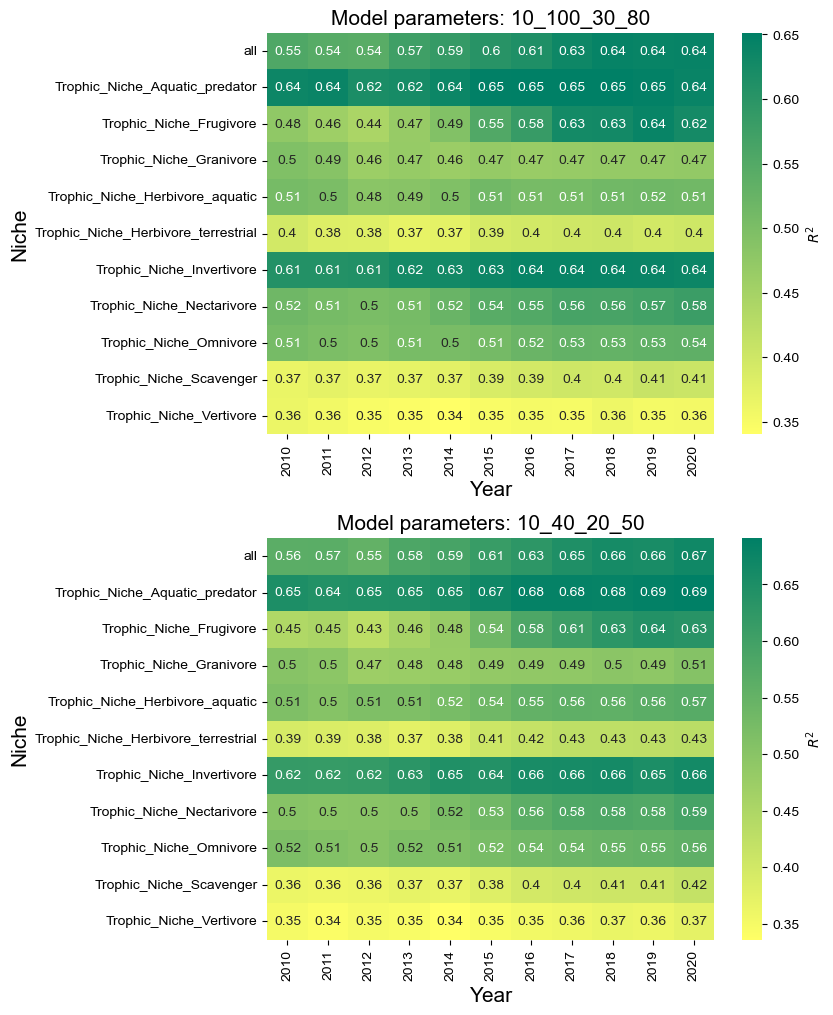

In [72]:

fig,axes = plt.subplots(2,1,figsize=(11/(1*1.3),20/(1.5*1.3)))
glue = res[res['model']=='10_100_30_80'].pivot(index="niche", columns="year", values="R2")
glue = glue.loc[niche_list, ]
f = sns.heatmap(glue,ax=axes[0], annot=True, cmap='summer_r',
                cbar_kws={'label': '$\it{R^2}$'})
axes[0].set_xticks(axes[0].get_xticks(), axes[0].get_xticklabels(), rotation=90)
axes[0].set_xlabel('Year',fontsize=15)
axes[0].set_ylabel('Niche',fontsize=15)
axes[0].set_title('Model parameters: 10_100_30_80',fontsize=15)


glue = res[res['model']=='10_40_20_50'].pivot(index="niche", columns="year", values="R2")
glue = glue.loc[niche_list, ]
f = sns.heatmap(glue,ax=axes[1], annot=True, cmap='summer_r',
                cbar_kws={'label': '$\it{R^2}$'})
axes[1].set_xticks(axes[1].get_xticks(), axes[1].get_xticklabels(), rotation=90)
axes[1].set_xlabel('Year',fontsize=15)
axes[1].set_ylabel('Niche',fontsize=15)
axes[1].set_title('Model parameters: 10_40_20_50',fontsize=15)
plt.tight_layout()
plt.savefig('model_r2.pdf')
